In [17]:
import os,shutil
import h5py
import matplotlib.pyplot as plt

import modules
# Helpers
from SimEx.Utilities.Units import meter, electronvolt, joule, radian

# PMI
from SimEx.Calculators.XMDYNDemoPhotonMatterInteractor import XMDYNDemoPhotonMatterInteractor

# Simple Beam Parameters
from SimEx.Parameters.PhotonBeamParameters import PhotonBeamParameters

# Diffraction
from SimEx.Parameters.DetectorGeometry import DetectorGeometry, DetectorPanel
from SimEx.Parameters.SingFELPhotonDiffractorParameters import SingFELPhotonDiffractorParameters
from SimEx.Calculators.SingFELPhotonDiffractor import SingFELPhotonDiffractor

# Analysis
from SimEx.Analysis.XFELPhotonAnalysis import XFELPhotonAnalysis
from SimEx.Analysis.DiffractionAnalysis import DiffractionAnalysis, plotResolutionRings, azimuthalIntegration, totalNPattern,photonStatistics
from SimEx.Analysis.DiffractionAnalysis import plotRadialProjection

import matplotlib.colors as colors

In [2]:
def cleanUp(out_path):
    dirs_to_remove=[out_path]
    files_to_remove=[out_path+'.h5']

    for d in dirs_to_remove:
        if os.path.isdir(d):
            shutil.rmtree(d)
    for f in files_to_remove:
        if os.path.isfile(f):
            os.remove(f)

## SAXS pattern of Nitrogenase Iron Protein

The protein can be founded here: https://www.rcsb.org/structure/2NIP

In [52]:
# Beam setup
beam = PhotonBeamParameters(
    photon_energy=4.96e3 * electronvolt,
    beam_diameter_fwhm=1.0e-6 * meter,
    pulse_energy=1.0e-3 * joule * 3900,
)

# Detector setup
pixel_num = 250
sample_to_detector_distance = 0.13 # meter

p0 = DetectorPanel(ranges={
    'fast_scan_min': 0,
    'fast_scan_max': pixel_num-1,
    'slow_scan_min': 0,
    'slow_scan_max': pixel_num-1
},
                   pixel_size=220e-6 * meter,
                   photon_response=1.0,
                   distance_from_interaction_plane=sample_to_detector_distance * meter,
                   corners={
                       'x': -(pixel_num-1)/2,
                       'y': -(pixel_num-1)/2
                   },
                   fast_scan_xyz='1.0x',
                   slow_scan_xyz='1.0y')

detector_geometry = DetectorGeometry(panels=[p0])

In [53]:
diffraction_parameters = SingFELPhotonDiffractorParameters(
                                               uniform_rotation=True,
                                               slice_interval=1,
                                               number_of_slices=1,
                                               number_of_diffraction_patterns=40,
                                               detector_geometry=detector_geometry,
                                               beam_parameters = beam)

In [54]:
diffr_path = "diffr"

In [55]:
cleanUp(diffr_path)

In [56]:
diffractor = SingFELPhotonDiffractor(parameters=diffraction_parameters,
                                     input_path='2nip.pdb',
                                     output_path=diffr_path)

Notice: corners setting in the DetectorGeometry takes no effects in pysingFEL calculations.But it will still be exported by detector_geometry.serialize.


In [57]:
from timeit import default_timer as timer
start = timer()

status = diffractor.backengine()

end = timer()
print(end - start,'s') # Time in seconds
if (status == 0):
    print ("Successful!")
else:
    print ("Error code:",status)

initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
initializing ocelot...
54.56040403712541 s
Successful!


In [58]:
# Link the .h5 output generated from mpirun together
diffractor.saveH5()

## SAXS pattern analysis

### One SAXS pattern 

Total number of patterns in the dataset:  40
Number of patterns to analyze:  1


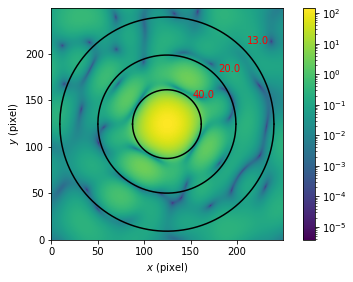

In [71]:
analyzer = DiffractionAnalysis(input_path=diffr_path+'.h5',
                               pattern_indices=3,
                               poissonize=False
                              )
print ('Total number of patterns in the dataset: ',totalNPattern(diffr_path+'.h5'))
print ('Number of patterns to analyze: ',analyzer.npattern)
fig, ax = analyzer.plotPattern(logscale=True)
plotResolutionRings(analyzer.parameters,rings= (40,20,13), half=False) # unit: Angstrom

  File "/gpfs/exfel/data/user/juncheng/miniconda3/envs/simex0.5/lib/python3.7/site-packages/SimEx/Analysis/DiffractionAnalysis.py", line 529, in azimuthalIntegration
    wavelength=lmd*1e-9)


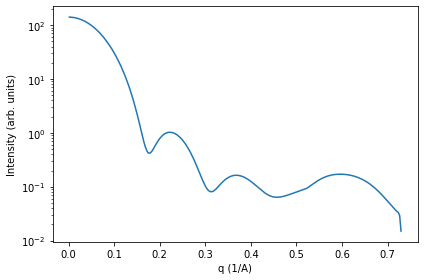

In [60]:
analyzer.plotRadialProjection(logscale=True,offset=0,unit="q_A^-1")

## Other patterns

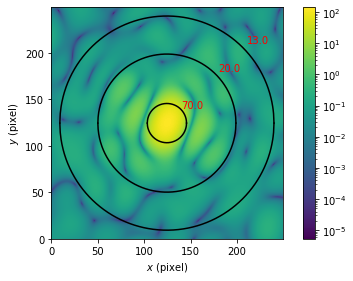

In [76]:
analyzer = DiffractionAnalysis(input_path=diffr_path+'.h5',
                               pattern_indices=2,
                               poissonize=False
                              )
fig, ax = analyzer.plotPattern(logscale=True)
plotResolutionRings(analyzer.parameters,rings= (70,20,13), half=False) # unit: Angstrom

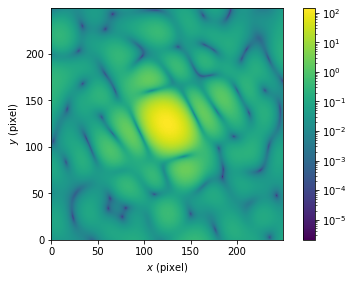

In [73]:
analyzer = DiffractionAnalysis(input_path=diffr_path+'.h5',
                               pattern_indices=1,
                               poissonize=False
                              )
fig, ax = analyzer.plotPattern(logscale=True)

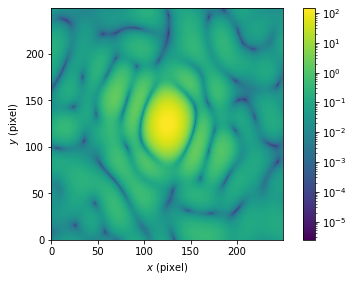

In [65]:
analyzer = DiffractionAnalysis(input_path=diffr_path+'.h5',
                               pattern_indices=5,
                               poissonize=False
                              )
fig, ax = analyzer.plotPattern(logscale=True)

## Averaged pattern

Number of patterns to average:  40


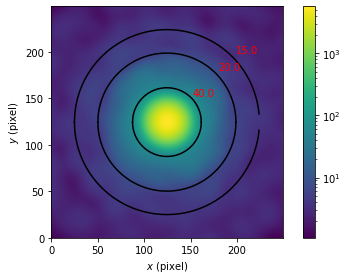

In [78]:
analyzer = DiffractionAnalysis(input_path=diffr_path+'.h5',
                               pattern_indices='all',
                               poissonize=False
                              )
print ('Number of patterns to average: ',analyzer.npattern)
analyzer.plotPattern(logscale=True)
plotResolutionRings(analyzer.parameters,rings= (40,20,15), half=False) # unit: Angstrom

  File "/gpfs/exfel/data/user/juncheng/miniconda3/envs/simex0.5/lib/python3.7/site-packages/SimEx/Analysis/DiffractionAnalysis.py", line 529, in azimuthalIntegration
    wavelength=lmd*1e-9)


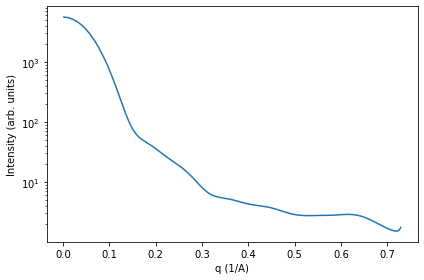

In [79]:
analyzer.plotRadialProjection(logscale=True,offset=0,unit="q_A^-1")

### Photon statistics

*************************
avg = 1.32980e+05
std = 1.56075e+04
avg_mean = 2.12769e+00
avg_max = 1.41751e+02
avg_min = 1.81095e-06
*************************


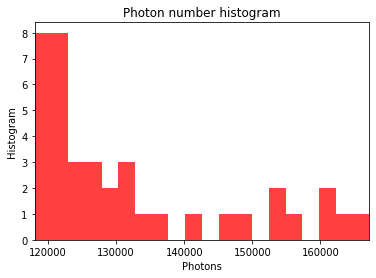

In [80]:
analyzer.statistics()

This project has received funding from the European Union's Horizon 2020 research and innovation programme under grant agreement No. 823852.